In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
df = pd.read_csv('Email spam.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### Count of Spam and Normal Emails in the dataset 

Text(0.5, 0, 'spam')

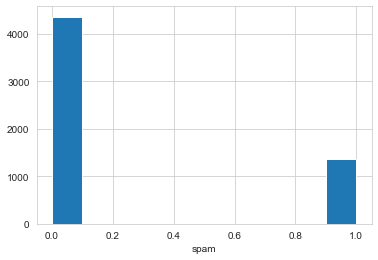

In [5]:
sns.set_style('whitegrid')
df['spam'].hist(bins=10)
plt.xlabel('spam')

###### Determining Text Lenght of each email 

In [6]:
df['text length'] = df['text'].apply(len)

In [7]:
df.head()

,text,spam,text length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


###### Range of Text Lenght in the dataset

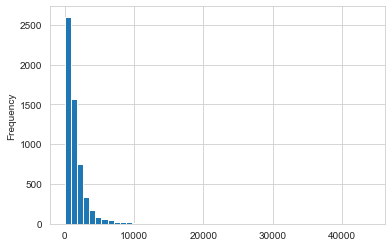

In [8]:
df['text length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A74DE41888>,
      dtype=object)

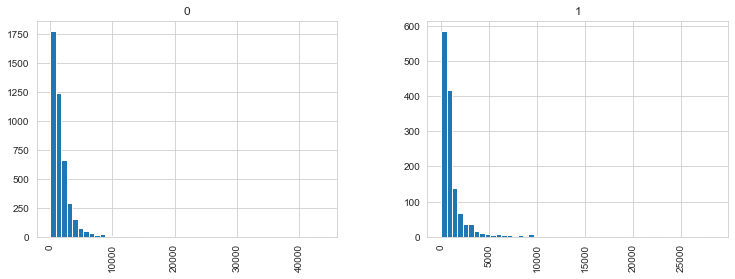

In [9]:
df.hist(column='text length',by='spam',bins=50,figsize=(12,4))

###### Text Pre-processing

In [10]:

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91967\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def text_process(sample_text):

    nopunc = [char for char in sample_text if char not in string.punctuation]

    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

###### Raw data 

In [12]:
df.head()

,text,spam,text length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


###### Pre-Processed data

In [13]:
df['text'].head(5).apply(text_process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [14]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

print(len(bow_transformer.vocabulary_))

37229


In [16]:
df4 = df['text'][3]
print(df4)

Subject: 4 color printing special  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com  request additional information now ! click here  click here for a printable version of our order form ( pdf format )  golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation . 


In [17]:
df4 = bow_transformer.transform([df4])
print(df4)
print(df4.shape)

  (0, 1536)	2
  (0, 1821)	1
  (0, 2189)	1
  (0, 2546)	2
  (0, 3096)	1
  (0, 3102)	1
  (0, 3375)	1
  (0, 3638)	1
  (0, 3983)	2
  (0, 4148)	1
  (0, 5916)	1
  (0, 7627)	1
  (0, 7837)	1
  (0, 8867)	4
  (0, 9144)	1
  (0, 9165)	1
  (0, 12578)	2
  (0, 14451)	1
  (0, 15083)	2
  (0, 15096)	2
  (0, 16062)	1
  (0, 16063)	1
  (0, 16217)	1
  (0, 18238)	2
  (0, 18850)	1
  (0, 21358)	2
  (0, 22239)	1
  (0, 24602)	2
  (0, 25420)	2
  (0, 25825)	1
  (0, 26876)	2
  (0, 26881)	2
  (0, 27783)	1
  (0, 27917)	1
  (0, 28699)	2
  (0, 31342)	1
  (0, 31535)	1
  (0, 35388)	2
(1, 37229)


In [18]:
print(bow_transformer.get_feature_names()[15083])
print(bow_transformer.get_feature_names()[28699])

form
request


In [19]:
messages_bow = bow_transformer.transform(df['text'])

In [20]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5728, 37229)
Amount of Non-Zero occurences:  565908


In [21]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(df4)
print(tfidf4)

  (0, 35388)	0.15009924829386814
  (0, 31535)	0.07911749812249139
  (0, 31342)	0.10451789615280674
  (0, 28699)	0.13491907850445484
  (0, 27917)	0.09440125957327901
  (0, 27783)	0.16364865212009344
  (0, 26881)	0.24467667505731658
  (0, 26876)	0.29488017392240273
  (0, 25825)	0.05978682676762733
  (0, 25420)	0.18310050334136746
  (0, 24602)	0.13202412798634627
  (0, 22239)	0.051084627712002784
  (0, 21358)	0.10288574502638495
  (0, 18850)	0.1714050833961326
  (0, 18238)	0.09675112717120636
  (0, 16217)	0.1714050833961326
  (0, 16063)	0.1714050833961326
  (0, 16062)	0.13162596285519088
  (0, 15096)	0.20264439881127697
  (0, 15083)	0.14267095050584133
  (0, 14451)	0.059703107976188226
  (0, 12578)	0.09903595084928829
  (0, 9165)	0.03967747988499745
  (0, 9144)	0.12233833752865829
  (0, 8867)	0.26688845697733726
  (0, 7837)	0.1714050833961326
  (0, 7627)	0.08511363424674641
  (0, 5916)	0.1714050833961326
  (0, 4148)	0.10060023775103406
  (0, 3983)	0.1420620343113847
  (0, 3638)	0.01912971

In [23]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

4.025675160717941
3.2782714545804814


In [24]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5728, 37229)


In [25]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['spam'])

In [26]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.spam[3])

predicted: 0
expected: 1


In [27]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[1 1 1 ... 0 0 0]


In [28]:
from sklearn.metrics import classification_report
print (classification_report(df['spam'], all_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4360
           1       1.00      0.77      0.87      1368

    accuracy                           0.95      5728
   macro avg       0.97      0.88      0.92      5728
weighted avg       0.95      0.95      0.94      5728



In [29]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['text'], df['spam'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4582 1146 5728


In [30]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [31]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002A7500C79D8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [32]:
predictions = pipeline.predict(msg_test)

In [33]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       990
           1       0.55      1.00      0.71       156

    accuracy                           0.89      1146
   macro avg       0.78      0.94      0.82      1146
weighted avg       0.94      0.89      0.90      1146



In [34]:
testing = pd.DataFrame(predictions,msg_test)

In [36]:
import pickle 

In [37]:
import pickle

file_name = 'pipelinemodel'
pickle.dump(pipeline, open(file_name, 'wb'))

# Deployment

In [38]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.YELLOW)

Hello World !


In [39]:
def separatemail(message):
    loaded_model = pickle.load(open('pipelinemodel', 'rb'))
    ar = []
    ar.append(message)
#     print(ar[0])
    r=loaded_model.predict(ar)
    if r==1:
        print(color.BOLD+"Email is spam and harmful to the nature as it is releasing carbondioxide"+color.GREEN)
    else:
        print(color.BOLD+"The email is safe and carbon free"+color.YELLOW)

In [43]:
import imaplib
import email

#credentials
username ="krishnaprahladm@gmail.com"

#generated app password
app_password= "jquymxpwfcbxwvdz"

# https://www.systoolsgroup.com/imap/
gmail_host= 'imap.gmail.com'

#set connection
mail = imaplib.IMAP4_SSL(gmail_host)

#login
mail.login(username, app_password)

#select inbox
mail.select("INBOX")

mailid = input("Please enter the mail id to be verified for carbon foot prints")

frommail = '(FROM '+ mailid +')'
#select specific mails
_, selected_mails = mail.search(None,frommail )

#total number of mails from specific user
print("Total Messages from {}".format(mailid) , len(selected_mails[0].split()))

for num in selected_mails[0].split():
    _, data = mail.fetch(num , '(RFC822)')
    _, bytes_data = data[0]

    #convert the byte data to message
    email_message = email.message_from_bytes(bytes_data)
    print("\n===========================================")

    #access data
    print("Subject: ",email_message["subject"])
    print("To:", email_message["to"])
    print("From: ",email_message["from"])
    print("Date: ",email_message["date"])
    for part in email_message.walk():
        if part.get_content_type()=="text/plain" or part.get_content_type()=="text/html":
            message = part.get_payload(decode=True)
            print(len(message.decode()))
            separatemail(str(message.decode()))
            print("Message: \n", message.decode())
            print("==========================================\n")
            break

Please enter the mail id to be verified for carbon foot printskeshavkrishna015@gmail.com
Total Messages from keshavkrishna015@gmail.com 22

Subject:  NN012004035261(1).pdf (insu)
To: krishnaprahladm@gmail.com, keshav krishna <keshavkrishna015@gmail.com>, 
	programinseconds@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Sun, 3 May 2020 14:05:35 +0530
2
The email is safe and carbon free
Message: 
 



Subject:  Fwd: Bharti AXA Life insurance
To: krishnaprahladm@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Sat, 16 May 2020 13:30:46 +0530
254
The email is safe and carbon free
Message: 
 ---------- Forwarded message ---------
From: Vidya Sagar <tappavidyasagar1975@gmail.com>
Date: Fri, May 15, 2020, 5:40 PM
Subject: Bharti AXA Life insurance
To: <keshavkrishna015@gmail.com>


1540890930874_Cashless-Hospital-Network-List-Mar-2016



Subject:  Fwd: Bharti AXA Life insurance
To: krishnaprahladm@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.


Subject:  1113021647-10000104304.pdf
To: krishnaprahladm@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Thu, 9 Jul 2020 14:51:41 +0530
2
The email is safe and carbon free
Message: 
 



Subject:  Fwd: Letters
To: keshav krishna <keshavkrishna015@gmail.com>, krishnaprahladm@gmail.com, 
	programinseconds@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Wed, 29 Jul 2020 19:53:59 +0530
1613
The email is safe and carbon free
Message: 
 ---------- Forwarded message ---------
From: DODIA ANKIT <DODIA.ANKIT@mahindra.com>
Date: Thu, 27 Feb 2020 at 14:36
Subject: Letters
To: keshavkrishna015@gmail.com <keshavkrishna015@gmail.com>
Cc: SAWANT KOMAL – MIBS <SAWANT.KOMAL2@mahindra.com>, DODIA ANKIT <
DODIA.ANKIT@mahindra.com>, SAWANT VISHNU - MIBS <SAWANT.VISHNU2@mahindra.com>,
SINGH SHWETA - MIBS <SINGH.SHWETA@mahindra.com>, D'COSTA MURIEL - MIBS <
D'COSTA.MURIEL@mahindra.com>, KASIREDDY SREENIVASULU <
KASIREDDY.SREENIVASULU@mahindra.com>


Dear Sir,



Plea


Subject:  CamScanner 07-22-2020 11.46.44 - Page 1.pdf
To: krishnaprahladm@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Tue, 11 Aug 2020 14:17:26 +0530
25
The email is safe and carbon free
Message: 
 Scanned with CamScanner



Subject:  CamScanner 07-22-2020 11.46.44 - Page 1.pdf
To: krishnaprahladm@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Tue, 11 Aug 2020 14:17:26 +0530
25
The email is safe and carbon free
Message: 
 Scanned with CamScanner



Subject:  Fwd: Recharge successful for JioFiber connection having JioFixedVoice
 Number +918451356455
To: krishnaprahladm@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Thu, 24 Dec 2020 20:28:28 +0530
771
The email is safe and carbon free
Message: 
 Enjoy this plan up to 23/01/21

---------- Forwarded message ---------
From: <notifications_jiofiber@jio.com>
Date: Thu, Dec 24, 2020, 8:20 PM
Subject: Recharge successful for JioFiber connection having JioFixedVoice
Number +91845


Subject:  Fwd:
To: krishnaprahladm@gmail.com
From:  keshav krishna <keshavkrishna015@gmail.com>
Date:  Fri, 7 May 2021 11:34:38 +0530
2071
The email is safe and carbon free
Message: 
 ---------- Forwarded message ---------
From: keshav krishna <keshavkrishna015@gmail.com>
Date: Fri, 7 May 2021, 11:33 am
Subject: Fwd:
To: <keshavkrishna015@gmail.com>



---------- Forwarded message ---------
From: keshav krishna <keshavkrishna015@gmail.com>
Date: Fri, 7 May 2021, 11:30 am
Subject: Fwd:
To: keshav krishna <keshavkrishna015@gmail.com>



---------- Forwarded message ---------
From: keshav krishna <keshavkrishna015@gmail.com>
Date: Fri, 7 May 2021, 11:27 am
Subject: Fwd:
To: <keshavkrishna015@gmail.com>



---------- Forwarded message ---------
From: keshav krishna <keshavkrishna015@gmail.com>
Date: Fri, 7 May 2021, 10:48 am
Subject: Fwd:
To: keshav krishna <keshavkrishna015@gmail.com>



---------- Forwarded message ---------
From: Front Office - Aster Prime <frontoffice1.prime@asterhosp